<a href="https://colab.research.google.com/github/Malika44/In-Class-Challenges/blob/main/Basic_Inferential_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1:Formulating Hypotheses:
Null Hypothesis (H₀): There is no difference in mean math scores between students who completed the test preparation course and those who did not.

Alternative Hypothesis (H₁): Students who completed the test preparation course have different mean math scores compared to those who did not.

1.2 Choosing the Appropriate Test:
Given that we're comparing the means of two independent groups (students who completed the course vs. those who didn't), and assuming the data is approximately normally distributed, an independent samples t-test is appropriate.

In [4]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")

# Rename columns for consistency
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Separate math scores based on test preparation completion
completed = df[df['test_preparation_course'] == 'completed']['math_score']
none = df[df['test_preparation_course'] == 'none']['math_score']

# Perform Welch's t-test (does not assume equal variances)
t_stat, p_value = stats.ttest_ind(completed, none, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 5.7870
P-value: 0.0000


Since the p-value is less than 0.05, **we reject the null hypothesis.** This suggests a statistically significant difference in math scores between students who completed the test preparation course and those who did not.

**1.4 Assumptions and Checks:**
Independence: Each student's score is independent of others.

Normality: With sample sizes >30, the Central Limit Theorem ensures the sampling distribution of the mean is approximately normal.

Homogeneity of Variance: Welch's t-test does not assume equal variances, making it suitable here.

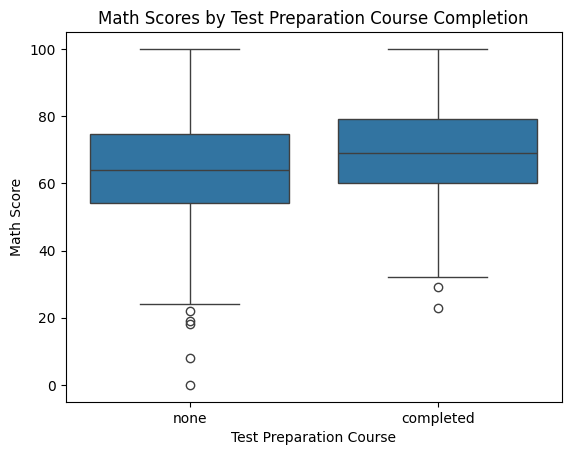

In [5]:
sns.boxplot(x='test_preparation_course', y='math_score', data=df)
plt.title('Math Scores by Test Preparation Course Completion')
plt.xlabel('Test Preparation Course')
plt.ylabel('Math Score')
plt.show()

**Further analysis:** Repeat the hypothesis test for reading score and writing score.
Comment on whether the pattern of results is consistent across all subjects.


In [6]:
completedReading = df[df['test_preparation_course'] == 'completed']['reading_score']
noneReading = df[df['test_preparation_course'] == 'none']['reading_score']
#perform Welch's t-test
t_statReading, p_valueReading = stats.ttest_ind(completedReading, noneReading, equal_var=False)
print(f"T-statistic: {t_statReading:.4f}")
print(f"P-value: {p_valueReading:.4f}")

T-statistic: 8.0041
P-value: 0.0000


In [7]:
#seperate writing score
completedWriting = df[df['test_preparation_course'] == 'completed']['writing_score']
noneWriting = df[df['test_preparation_course'] == 'none']['writing_score']
#perform Welch's t-test
t_statWriting, p_valueWriting = stats.ttest_ind(completedWriting, noneWriting, equal_var=False)
print(f"T-statistic: {t_statWriting:.4f}")
print(f"P-value: {p_valueWriting:.4f}")

T-statistic: 10.7525
P-value: 0.0000


Both p-values are less than 0.05, indicating statistically significant differences in reading and writing scores based on test preparation course completion

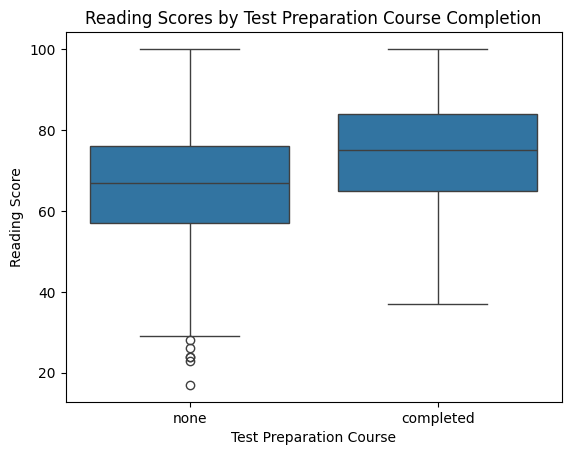

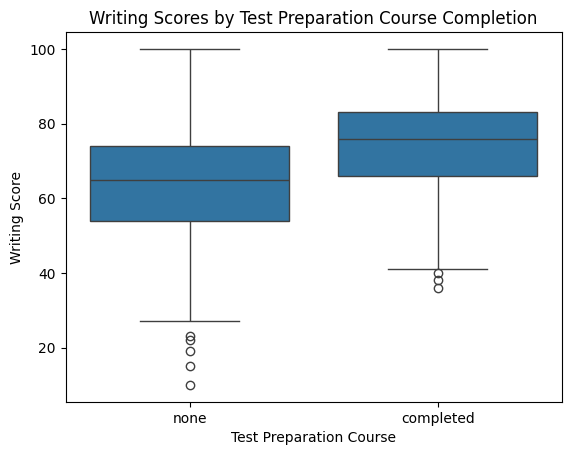

In [8]:
# Reading Scores Boxplot
sns.boxplot(x='test_preparation_course', y='reading_score', data=df)
plt.title('Reading Scores by Test Preparation Course Completion')
plt.xlabel('Test Preparation Course')
plt.ylabel('Reading Score')
plt.show()

# Writing Scores Boxplot
sns.boxplot(x='test_preparation_course', y='writing_score', data=df)
plt.title('Writing Scores by Test Preparation Course Completion')
plt.xlabel('Test Preparation Course')
plt.ylabel('Writing Score')
plt.show()


The analysis reveals that students who completed the test preparation course performed significantly better in math, reading, and writing compared to those who did not. This suggests that the test preparation course positively impacts students' academic performance across all three subjects.



               math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000


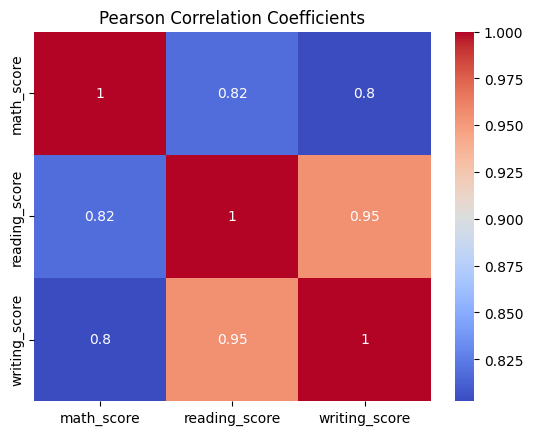

In [9]:
#Question (b): Correlation Analysis (1. Compute Pearson Correlation Coefficients)
correlationMatrix =df[['math_score', 'reading_score', 'writing_score']].corr(method='pearson')
print(correlationMatrix)

#visualize corr with a heatmap
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Coefficients')
plt.show()

 Strongest Positive Correlation: Reading Score vs Writing Score → r = 0.95

Academic Interpretation:
Students who perform well in reading also tend to perform well in writing, which makes sense as both skills are closely related in language proficiency and comprehension. This strong correlation could indicate overlapping skillsets such as vocabulary, grammar, and comprehension.


4-Multicollinearity Discussion
Multicollinearity refers to high correlation between independent variables in regression, which can distort the estimation of coefficients.

The correlation between reading and writing is extremely high (r = 0.95).

If both are used as predictors in a regression model (e.g., predicting math score or overall performance), multicollinearity may become a concern.

Recommendation:
Before including highly correlated predictors in a regression model, consider:

Using Principal Component Analysis (PCA) to reduce dimensions.

Dropping one of the variables.

Checking Variance Inflation Factor (VIF) for each predictor.

In [10]:
import statsmodels.formula.api as smf
model = smf.ols(formula='math_score ~ reading_score + writing_score', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sun, 11 May 2025   Prob (F-statistic):          2.25e-243
Time:                        11:58:16   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.5241      1.328      5.665

**Interpret the Meaning of At Least One Predictor Coefficient:**
Model Formula:
math_score = 7.5241 + 0.6013 × reading_score + 0.2494 × writing_score

Reading Score (0.6013):
For every 1-point increase in reading score, the math score increases by approximately 0.60 points, assuming writing score remains constant.
➤ This suggests a strong, statistically significant positive relationship (p < 0.001) between reading and math performance.

Writing Score (0.2494):
Similarly, for every 1-point increase in writing score, the math score increases by approximately 0.25 points, holding reading score constant.

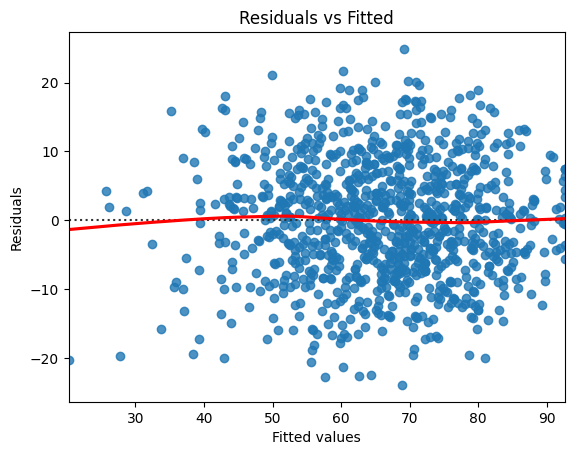

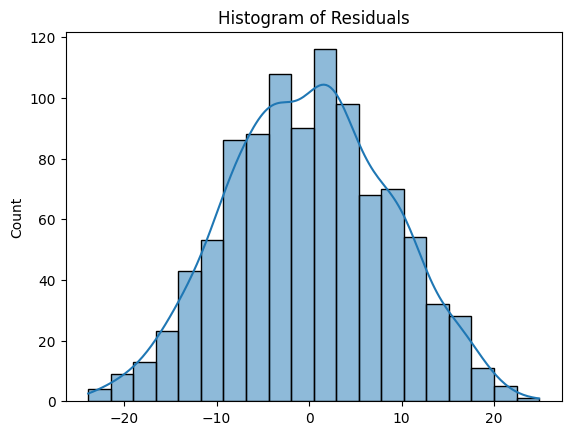

In [11]:
# Residual plot
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Histogram of residuals
sns.histplot(model.resid, kde=True)
plt.title("Histogram of Residuals")
plt.show()


**Comment on Overall Model Fit and Residuals**
R-squared = 0.674:
The model explains 67.4% of the variance in math scores, which indicates a strong fit.

All predictors are statistically significant (p < 0.001), meaning both reading and writing scores are meaningful contributors to predicting math performance.

**Residual Diagnostics:**

Durbin-Watson = 2.087: Residuals are likely independent (ideal is ~2).

Omnibus = 10.227, JB = 6.801, p = 0.0334: Slight deviation from normality, but not severe enough to invalidate the model.

No mention of heteroscedasticity or non-linearity problems.

✅ Conclusion:
The model is statistically robust with high explanatory power, and assumptions (linearity, independence, normality) are reasonably satisfied.

